In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd "/content/drive/MyDrive/Sample_txt"

/content/drive/MyDrive/Sample_txt


In [2]:
def read_txt(path):
  with open(path,'r') as f:
    text = f.read()
  
  return text

In [ ]:
samp_path = "/content/drive/MyDrive/Sample_txt/Age_of_ultron_samp.txt"

In [ ]:
test_txt = read_txt(samp_path)
print(test_txt)

In [ ]:
te = test_txt.split()
te

In [ ]:
for word in te:
  print(word,end = ", ")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
doc = nlp(test_txt)
all_names = set()
for ent in doc.ents:
  if(ent.label_ == "PERSON"):
    all_names.add(ent.text.lower())
    print(ent.text)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Sample Algorithm for making the edges between graphs.
bucket = ""
G = nx.Graph()
f = 0
node1 = ""
node2 = ""
A = 0
L = 0
c_names = []
for ch in test_txt:

  if ch.strip() == ',':
    A = 1
    bucket = ""

  if ch == '\n':
    bucket = ""

  if bucket.lower().strip() in all_names:
    if A == 1 or L == 1:
      c_names.append(bucket.strip())
      bucket = ""
      
    if L == 1:
      n1 = 0
      n2 = 0
      while(n1<len(c_names)):
        n2 = 0
        while(n2<len(c_names)):
          if(n2!=n1):
            if(G.has_node(c_names[n1]) == False):
              G.add_node(c_names[n1])
            if(G.has_node(c_names[n2]) == False):
              G.add_node(c_names[n2])
            G.add_edge(c_names[n1],c_names[n2])
          n2+=1
        n1+=1

      c_names = []
      L = 0
      A = 0
      bucket = ""


    if f == 0:
      node1 = bucket.strip()
      if(G.has_node(node1) == False):
        G.add_node(node1)
      

    if f == 1:
      node2 = bucket.strip()
      if(G.has_node(node2) == False):
        G.add_node(node2)
      if(node1 != node2):
        G.add_edge(node1,node2)
      
      f = 0
    
    bucket = ""

  if bucket.strip() == "and":
    if A == 1:
      L = 1
      bucket = ""

    if A != 1:
      f = 1
      bucket = ""

  bucket += ch

/usr/local/lib/python3.9/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


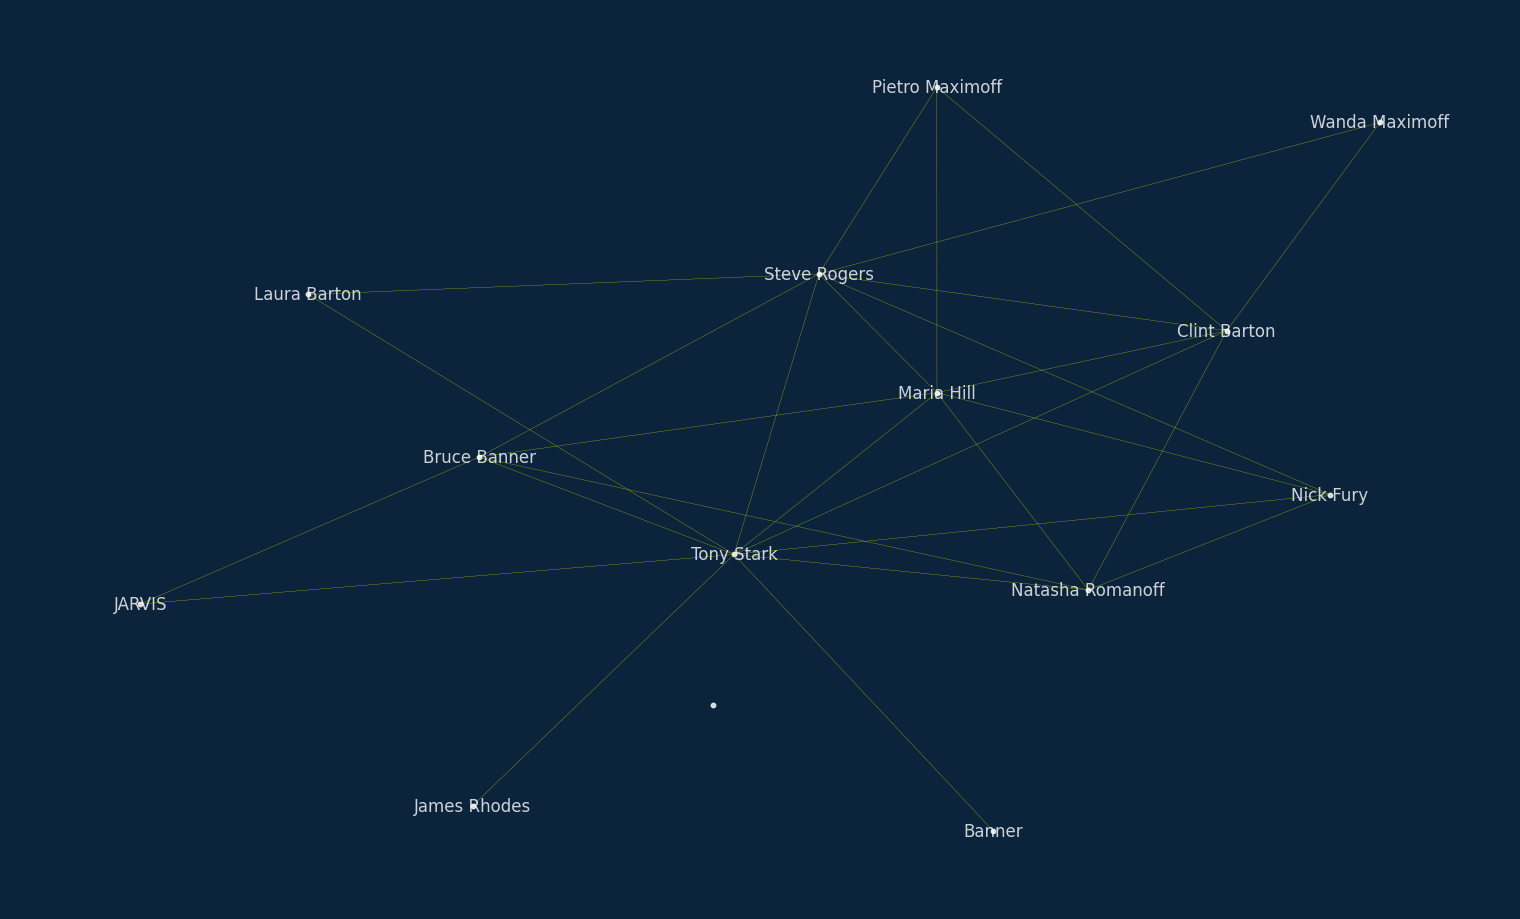

In [ ]:
# Plotting the Graph.
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys
# nx.draw_networkx_nodes(G, pos, node_size=1000, cmap = cmap, node_color='lightblue')
# nx.draw_networkx_labels(G, pos, font_size=1, font_weight='bold)
# nx.draw_networkx_edges(G, pos, edge_color='gray')
fig = plt.figure(figsize = (15,9), dpi=100)
nx.draw(G,pos,alpha = 0.8, node_color = 'w', node_size = 10, with_labels= True,font_size = 12,font_color = 'white', width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')
plt.axis('off')
# print(movie)
plt.show()

In [4]:
%cd "/content/drive/MyDrive/Marvel"

/content/drive/MyDrive/Marvel


In [5]:
char_path = "/content/drive/MyDrive/Marvel/characters.csv"
df_char = pd.read_csv(char_path)
df_char.head()

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,173,137,119,0,165,0,0,0,...,74,152,0,0,0,1788,22590,9,12,198
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,...,7,121,0,0,0,977,8653,10,8,97
2,THOR,0,55,70,74,0,0,0,0,0,...,0,47,166,289,133,863,9487,7,10,123
3,PETER PARKER,0,0,7,39,0,73,0,0,0,...,402,0,0,0,0,551,5517,4,10,137
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,...,0,97,0,1,0,498,4689,10,9,49


In [6]:
def plot_my_G(G):
  pos = nx.kamada_kawai_layout(G)
  cmap = plt.cm.viridis_r
  cmap = plt.cm.Greys
  # nx.draw_networkx_nodes(G, pos, node_size=1000, cmap = cmap, node_color='lightblue')
  # nx.draw_networkx_labels(G, pos, font_size=1, font_weight='bold)
  # nx.draw_networkx_edges(G, pos, edge_color='gray')
  fig = plt.figure(figsize = (15,9), dpi=100)
  nx.draw(G,pos,alpha = 0.8, node_color = 'w', node_size = 10, with_labels= True,font_size = 12,font_color = 'white', width = 0.2, cmap = cmap, edge_color ='yellow')
  fig.set_facecolor('#0B243B')
  plt.axis('off')
  # print(movie)
  plt.show()

In [7]:
# Code for making the array of all the characters from the CSV file.
char_l = list(df_char['character'])
i = 0
while(i<len(char_l)):
  char_l[i] = char_l[i].lower()
  i+=1

# for ch in char_l:
#   if ch == "jarvis":
#     print("yes")
# char_l.append()
print(char_l)
print(len(char_l))

['tony stark', 'steve rogers', 'thor', 'peter parker', 'natasha romanoff', 'pepper potts', 'bruce banner', 'nick fury', 'loki', 'scott lang', 'james rhodes', 'peter quill', 'carol danvers', 'jane foster', 'rocket', 'clint barton', 'sam wilson', 'gamora', "t'challa", 'happy hogan', 'hank pym', 'odin', 'jarvis', 'ned leeds', 'erik selvig', 'phil coulson', 'bucky barnes', 'thanos', 'drax', 'wanda maximoff', 'darcy lewis', 'adrian toomes', 'peggy carter', 'shuri', 'hope van dyne', 'valkyrie', 'luis', 'justin hammer', 'ultron', 'maria hill', 'nebula', 'stephen strange', 'vision', 'volstagg', 'nakia', 'liz toomes', 'yon-rogg', 'yondu', 'frigga', 'okoye', 'karen', 'mantis', 'everett ross', 'maya hansen', 'howard stark', 'sif', 'alexander pierce', 'col. chester phillips', 'talos', 'aldrich killian', 'ego', 'fandral', 'red skull', 'darren cross', "n'jadaka (killmonger)", 'heimdall', 'harley keener', 'obadiah stane', 'james "jim" paxton', 'brock rumlow', 'may parker', 'maria rambeau', 'hulk', 'd

In [ ]:
# Algorithm for making the edges between nodes using the characters from the CSV file.
# trying it for Age of ultron
bucket = ""
char_inM = set()
G1 = nx.Graph()
f = 0
for ch in test_txt:
  if ch == '\n':
    bucket = ""
  if bucket.strip().lower() in char_l:
    if f == 0:
      char_inM.add(bucket.strip())
      node1 = bucket.strip()
      if(G1.has_node(node1) == False):
        G1.add_node(node1)
    
    if f == 1:
      node2 = bucket.strip()
      if(G1.has_node(node2) == False):
        G1.add_node(node2)
      f = 0
      if node1 != node2:
        G1.add_edge(node1,node2)

    bucket = ""
  
  if bucket.strip() == "and":
    f = 1
    bucket = ""

  bucket += ch

In [ ]:
len(char_inM)
# print(G1.number_of_nodes())

15

/usr/local/lib/python3.9/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


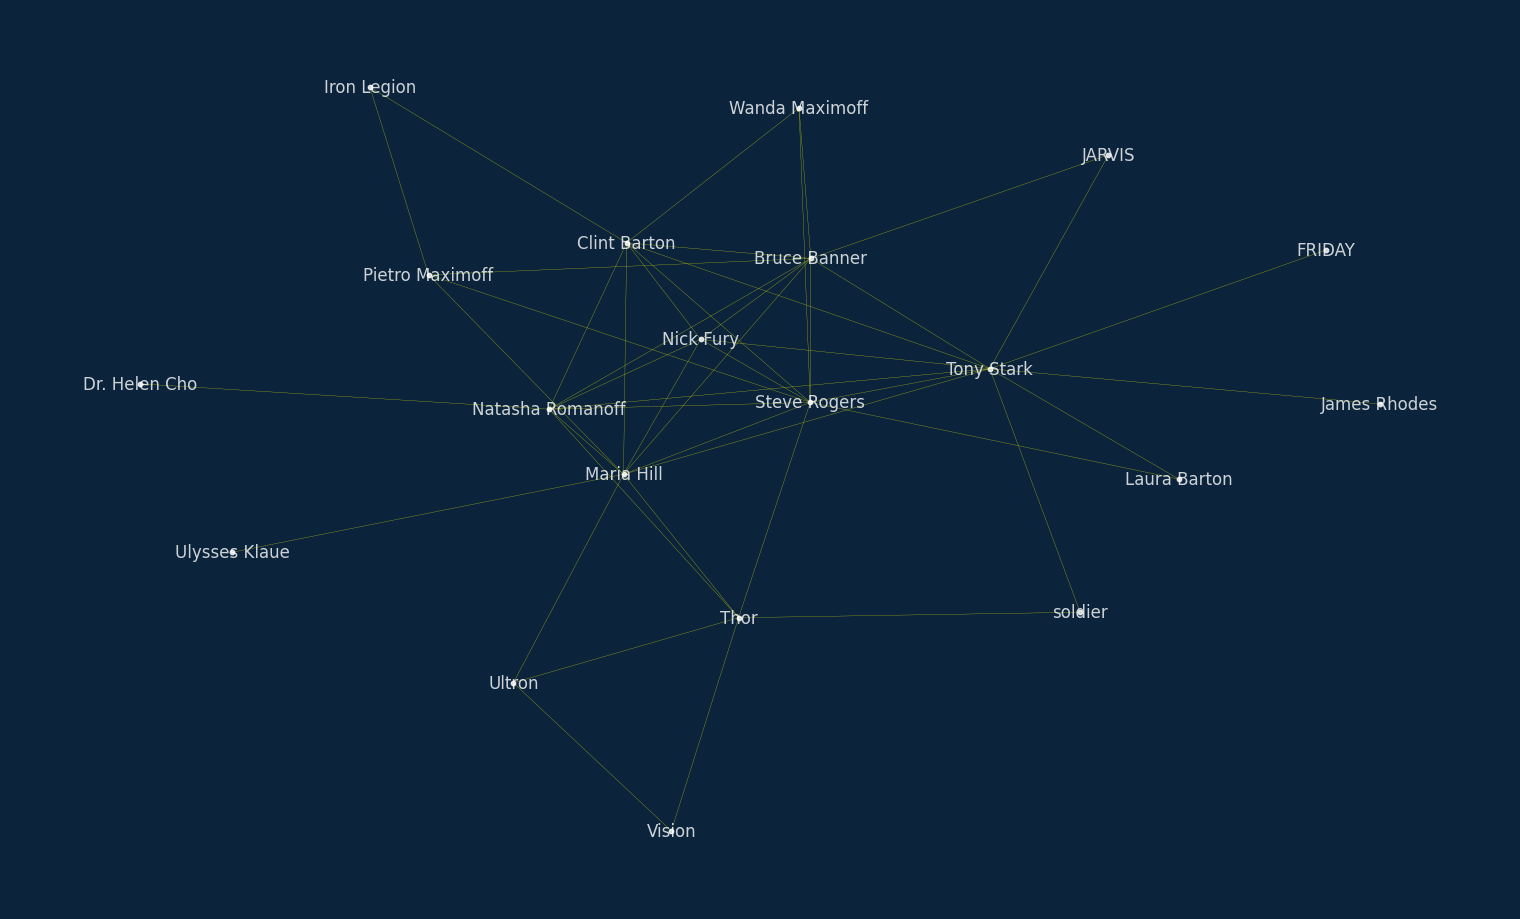

In [ ]:
plot_my_G(G1)

For All articles

In [42]:
# Movies Paths from Drive
Age_of_ultron = "/content/drive/MyDrive/Sample_txt/Age_of_ultron.txt"
Ant_man = "/content/drive/MyDrive/Sample_txt/ant_man.txt"
Infinity_war = "/content/drive/MyDrive/Sample_txt/Infinity_War.txt"
Captain_america_1 = "/content/drive/MyDrive/Sample_txt/Captain_America.txt"
Captain_marvel = "/content/drive/MyDrive/Sample_txt/Captain_Marvel.txt"
Black_Panther = "/content/drive/MyDrive/Sample_txt/Black_Panther.txt"
Civil_war = "/content/drive/MyDrive/Sample_txt/Civil_war.txt"
Guardians_vol2 = "/content/drive/MyDrive/Sample_txt/Guardians_Vol2.txt"
Iron_man_1 = "/content/drive/MyDrive/Sample_txt/Iron_Man_1.txt"
Iron_man_2 = "/content/drive/MyDrive/Sample_txt/Iron_Man_2.txt"
Iron_man_3 = "/content/drive/MyDrive/Sample_txt/Iron_Man_3.txt"
# Endgame = "/content/drive/MyDrive/Sample_txt/Endgame_1.txt"

In [47]:
Movies = []
Mov_Graph = []
Char_inM = []
age_ult = read_txt(Age_of_ultron)
Movies.append(age_ult)
ant_man = read_txt(Ant_man)
Movies.append(ant_man)
infinity_war = read_txt(Infinity_war)
Movies.append(infinity_war)
captain_america_1 = read_txt(Captain_america_1)
Movies.append(captain_america_1)
captain_marvel = read_txt(Captain_marvel)
Movies.append(captain_marvel)
black_panther = read_txt(Black_Panther)
Movies.append(black_panther)
civil_war = read_txt(Civil_war)
Movies.append(civil_war)
gurdians_vol2 = read_txt(Guardians_vol2)
Movies.append(gurdians_vol2)
iron_man1 = read_txt(Iron_man_1)
Movies.append(iron_man1)
iron_man2 = read_txt(Iron_man_2)
Movies.append(iron_man2)
iron_man3 = read_txt(Iron_man_3)
Movies.append(iron_man3)
# endgame = read_txt(Endgame)
# Movies.append(endgame)

In [17]:
G = nx.Graph()
for mov in Movies:
  bucket = ""
  char_inM = set()
  G1 = nx.Graph()
  f = 0
  for ch in mov:
    if ch == '\n':
      bucket = ""
    if bucket.strip().lower() in char_l:
      if f == 0:
        char_inM.add(bucket.strip())
        node1 = bucket.strip()
        if(G1.has_node(node1) == False):
          G1.add_node(node1)
        
        # For Big Graph
        if(G.has_node(node1) == False):
          G.add_node(node1)

      if f == 1:
        node2 = bucket.strip()
        if(G1.has_node(node2) == False):
          G1.add_node(node2)
        
        # For Big Graph
        if(G.has_node(node2) == False):
          G.add_node(node2)
        f = 0
        if node1 != node2:
          G1.add_edge(node1,node2)
        
        # For Big Graph
        if node1 != node2:
          G.add_edge(node1,node2)

      bucket = ""

    if bucket.strip() == "and":
      f = 1
      bucket = ""

    bucket += ch
  
  Mov_Graph.append(G1)
  Char_inM.append(char_inM)
  

In [ ]:
print("Age of Ultron")
plot_my_G(Mov_Graph[0])
print("---------------------------------------")
print("Ant Man")
plot_my_G(Mov_Graph[1])
print("---------------------------------------")
print("Infinity War")
plot_my_G(Mov_Graph[2])
print("---------------------------------------")
print("Captain America-1")
plot_my_G(Mov_Graph[3])
print("---------------------------------------")
print("MCU")
plot_my_G(G)

In [19]:
print(Mov_Graph[0].number_of_edges())
print(Mov_Graph[1].number_of_edges())
print(Mov_Graph[2].number_of_edges())
print(Mov_Graph[3].number_of_edges())
print(G.number_of_edges())

54
44
110
29
565


Weights analysis for strong and weak ties based on conversation 

In [20]:
G = nx.Graph()

In [21]:
def with_n(Txt,G):

  # Making the Graph

  All_Ties = {} # index = (node1, node2), value = the weight 
  bucket = ""
  Samp_text = Txt
  char_inM = set()
  G1 = nx.Graph()
  f = 0
  ch = 0
  while(ch<len(Samp_text)):
    if Samp_text[ch] == '\n':
      bucket = ""
    if bucket.strip().lower() in char_l:
      if f == 0:
        char_inM.add(bucket.strip())
        # node1 = bucket.strip().lower()
        node1 = bucket.strip()
        if(G1.has_node(node1) == False):
          G1.add_node(node1)

        if(G.has_node(node1) == False):
          G.add_node(node1)

      if f == 1:
        # node2 = bucket.strip().lower()
        node2 = bucket.strip()
        if(G1.has_node(node2) == False):
          G1.add_node(node2)

        if(G.has_node(node2) == False):
          G.add_node(node2)

        ch += 2
        if(Samp_text[ch].isnumeric()):
          if((node1,node2) not in All_Ties):
            All_Ties[(node1,node2)] = int(Samp_text[ch])
          else:
            All_Ties[(node1,node2)] += int(Samp_text[ch])

        f = 0
        if node1 != node2:
          G1.add_edge(node1,node2)
          G.add_edge(node1,node2)

      bucket = ""
    if bucket.strip() == "and":
      f = 1
      bucket = ""
    bucket += Samp_text[ch]
    ch+=1

  # Classifying w and s for the relations

  frq_v = []
  tot = sum(All_Ties.values())

  for x,y in All_Ties.items():
    frq_v.append(y)


  avg = tot/len(frq_v)


  Ties_type = {} # index = (node1, node2), value = "w" or "s"

  for f, y in zip(frq_v,All_Ties):
    if(f>=avg):
      Ties_type[y] = "s"
    else:
      Ties_type[y] = "w"

  # for x,y in Ties_type.items():
  #   print(x,"-->",y)

  return Ties_type,G1


In [22]:
def with_w_s(Txt,G):
  All_Ties_w_s = {} # index = (node1, node2), value = the weight 
  bucket = ""
  Samp_text = captain_america_1
  # char_inM = set()
  G1 = nx.Graph()
  f = 0
  ch = 0
  while(ch<len(Samp_text)):
    if Samp_text[ch] == '\n':
      bucket = ""
    if bucket.strip().lower() in char_l:
      if f == 0:
        char_inM.add(bucket.strip())
        # node1 = bucket.strip().lower()
        node1 = bucket.strip()
        if(G1.has_node(node1) == False):
          G1.add_node(node1)

        if(G.has_node(node1) == False):
          G.add_node(node1)

      if f == 1:
        # node2 = bucket.strip().lower()
        node2 = bucket.strip()
        if(G1.has_node(node2) == False):
          G1.add_node(node2)

        if(G.has_node(node2) == False):
          G.add_node(node2)

        ch += 2
        if(node1 != node2):
          if(Samp_text[ch] == 'w' or Samp_text[ch] == 's'):
            All_Ties_w_s[(node1,node2)] = Samp_text[ch]
          else:
            All_Ties_w_s[(node1,node2)] = 's'
        f = 0
        if node1 != node2:
          G1.add_edge(node1,node2)
          G.add_edge(node1,node2)

      bucket = ""
    if bucket.strip() == "and":
      f = 1
      bucket = ""
    bucket += Samp_text[ch]
    ch+=1

  return All_Ties_w_s,G1




Infinity War

In [ ]:
Ties_Type,G1 = with_n(infinity_war,G)
plt.rcParams["figure.figsize"] = [30.50, 25.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Ant Man

In [ ]:
Ties_Type,G1 = with_n(ant_man,G)
plt.rcParams["figure.figsize"] = [30.50, 25.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Age of Ultron

In [ ]:
Ties_Type,G1 = with_n(age_ult,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Captain America 1

In [ ]:
Ties_Type, G1 = with_w_s(captain_america_1,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Captain Marvel

In [ ]:
Ties_Type, G1 = with_n(captain_marvel,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Black Panther

In [ ]:
Ties_Type, G1 = with_n(black_panther,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Civil War

In [ ]:
Ties_Type, G1 = with_n(civil_war,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Gurdians_vol2

In [ ]:
Ties_Type, G1 = with_n(gurdians_vol2,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   G1, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Iron Man - 1

In [ ]:
# iron_man1
iron_man1_G = nx.Graph()
Ties_Type, iron_man1_G = with_n(iron_man1,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(iron_man1_G)
nx.draw(iron_man1_G, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   iron_man1_G, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Iron Man 2

In [ ]:
iron_man2_G = nx.Graph()
Ties_Type, iron_man2_G = with_n(iron_man2,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(iron_man2_G)
nx.draw(iron_man2_G, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   iron_man2_G, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

Iron Man 3

In [ ]:
iron_man3_G = nx.Graph()
Ties_Type, iron_man3_G = with_n(iron_man3,G)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
pos = nx.spring_layout(iron_man3_G)
nx.draw(iron_man3_G, pos, node_color='b', edge_color='g', width=2, with_labels=True)
nx.draw_networkx_edge_labels(
   iron_man3_G, pos,
   Ties_Type, label_pos=0.75
)
plt.show()

In [ ]:
plot_my_G(G)
print(G.number_of_nodes())
print(G.number_of_edges())

In [35]:
import numpy as np

In [36]:
def sort_dict_values(d):
  keys = list(d.keys())
  values = list(d.values())
  sorted_value_index = np.argsort(values)
  sorted_value_index = list(sorted_value_index)
  sorted_value_index.reverse()
  sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
  return sorted_dict

In [54]:
# Degree Centrality
# Degree centrality measures the number of connections a node has
# degree_centrality = nx.degree_centrality(G)

degree_cen_IronMan1 = nx.degree_centrality(iron_man1_G) # Iron man-1
degree_cen_IronMan2 = nx.degree_centrality(iron_man2_G) # Iron man-2
degree_cen_IronMan3 = nx.degree_centrality(iron_man3_G) # Iron man-3

In [62]:
degree_cen = nx.degree_centrality(G)
degree_cen = sort_dict_values(degree_cen)

In [ ]:
# i = 0
for x,y in degree_cen.items():
  # if i == 100:
  #   break
  print(x,": ",y)
  # i+=1

In [56]:
degree_cen_IronMan1 = sort_dict_values(degree_cen_IronMan1)
degree_cen_IronMan2 = sort_dict_values(degree_cen_IronMan2)
degree_cen_IronMan3 = sort_dict_values(degree_cen_IronMan3)

In [ ]:
# i = 0
for x,y in degree_cen_IronMan1.items():
  # if i == 100:
  #   break
  print(x,": ",y)
  # i+=1

In [ ]:
for x,y in degree_cen_IronMan2.items():
  # if i == 100:
  #   break
  print(x,": ",y)

In [ ]:
for x,y in degree_cen_IronMan3.items():
  # if i == 100:
  #   break
  print(x,": ",y)

In [ ]:
from networkx.algorithms.bipartite.centrality import betweenness_centrality
# Betweenness Centrality
# Betweenness centrality measures how often a node appears on the shortest path between other nodes
betweenness_centrality_ = nx.betweenness_centrality(G,k=None,normalized=True,weight=None,endpoints=False,seed=None)

In [ ]:
betweenness_centrality_ = sort_dict_values(betweenness_centrality_)

In [ ]:
for x,y in betweenness_centrality_.items():
  print(x,"-->",y)

In [ ]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

In [ ]:
print(top_level_communities[0])
print(top_level_communities[1])
print(top_level_communities[2])
print(top_level_communities[3])
print(len(top_level_communities))
print(len(next_level_communities))
print(next_level_communities[0])
print(next_level_communities[1])
print(next_level_communities[2])
print(next_level_communities[3])
print(next_level_communities[4])


{"T'Chaka", "T'Challa", 'Jasper Sitwell', 'Madame B', 'Gary', 'Police', 'Peggy Carter', 'Kraglin', 'Frank', 'Laura Barton', 'Ultron', 'Pietro Maximoff', 'Phil Coulson', 'Maria Stark', 'Pepper Potts', 'James Montgomery Falsworth', 'Hulk', 'Man', 'Thanos', 'Scott Lang', 'Dave', 'President Ellis', 'General', 'Pa', 'Expo Announcer', 'Mitchell Carson', 'Hope van Dyne', 'Jim Morita', 'Yondu', 'Senator Stern', 'Senator Brandt', 'Nick Fury', 'Vision', 'Shuri', 'Ayesha', 'Anton Vanko', 'Loki', 'Collector', 'Trevor Slattery', 'Happy Hogan', 'Thomas Richards', 'Drax', 'Jarvis', 'Okoye', 'Red Skull', 'James Rhodes', 'Harley Keener', 'Peter Parker', 'Howard Stark', 'Bucky', 'Everett Ross', "N'Jobu", 'Wanda Maximoff', 'Clint Barton', 'Christine Everhart', 'Justin Hammer', 'Vice President', 'Maria Hill', "Klaue's Mercenary", 'Hope Van Dyne', 'Proxima Midnight', 'Chad Davis', 'Jack', 'Aldrich Killian', 'FRIDAY', 'Maggie Lang', 'Sam Wilson', 'Nebula', 'Heimdall', 'Ned Leeds', 'Ivan Vanko', 'Young Gamor